# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=f2cb334aee0d8f1c4aaa53f4e4f9bd89&units=imperial&q='

In [6]:
# set up the lists to hold reponse info
lat = []
temp = [] 
humidity = []
clouds = []
wind = []
temp_max = []

#Variables to keep track of response number
record_num = 1
record_set = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        record_num += 1
    except Exception:
        print("City not found")
    #I've borrowed this piece of the code from internet wisdom; it turned out that Weather API has limitation
    #on calls per time. it seems to be working better with this limitation!
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


In [8]:
# create a data frame from the received inputs
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "clouds": clouds,
    "wind_speed": wind
}
weather_data_df = pd.DataFrame.from_dict(weather_dict, orient='index')
weather_data_df.transpose()
weather_data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,599,600,601,602,603,604,605,606,607,608
city,busselton,port alfred,svetlogorsk,hermanus,hilo,east london,bridlington,george,bredasdorp,kyaikkami,...,port hardy,malpe,kharp,nanortalik,saint anthony,georgiyevskoye,peniche,ruatoria,ketchikan,listvyagi
lat,-33.65,-33.59,52.63,-34.42,19.73,-33.02,54.08,-33.96,-34.53,16.08,...,None,None,None,None,None,None,None,None,None,None
temp,62.6,64,74.03,57,70.86,64.4,56.71,55.4,59,84.99,...,None,None,None,None,None,None,None,None,None,None
humidity,43,82,80,94,73,52,93,82,77,76,...,None,None,None,None,None,None,None,None,None,None
clouds,0,0,53,23,20,1,100,0,1,67,...,None,None,None,None,None,None,None,None,None,None
wind_speed,5.41,4,8.37,7,3.36,13.87,8.05,3.36,5.17,10.74,...,None,None,None,None,None,None,None,None,None,None


In [9]:
#drop missing data
weather_data_clean_df = weather_data_df.dropna(axis='columns')
weather_data_fin_df = weather_data_clean_df.transpose()
weather_data_fin_df.head()

,city,lat,temp,humidity,clouds,wind_speed
0,busselton,-33.65,62.6,43,0,5.41
1,port alfred,-33.59,64,82,0,4
2,svetlogorsk,52.63,74.03,80,53,8.37
3,hermanus,-34.42,57,94,23,7
4,hilo,19.73,70.86,73,20,3.36


In [10]:
weather_data_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        559 non-null    object
 1   lat         559 non-null    object
 2   temp        559 non-null    object
 3   humidity    559 non-null    object
 4   clouds      559 non-null    object
 5   wind_speed  559 non-null    object
dtypes: object(6)
memory usage: 30.6+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_data_fin_df.to_csv (r'C:\Users\spalt\OneDrive\Desktop\Python_APIs_Hwork\exp_weath_dataframe.csv', index = False, header=True)

In [12]:
print (weather_data_fin_df)

            city    lat   temp humidity clouds wind_speed
0      busselton -33.65   62.6       43      0       5.41
1    port alfred -33.59     64       82      0          4
2    svetlogorsk  52.63  74.03       80     53       8.37
3       hermanus -34.42     57       94     23          7
4           hilo  19.73  70.86       73     20       3.36
..           ...    ...    ...      ...    ...        ...
554         atar  45.02  61.36       77      1        4.7
555       kachug  58.73  58.66       47      0       9.33
556    mount isa  39.36  65.66       88      5       8.99
557    batsfjord  55.34   52.5       71     90       6.93
558         soyo  53.68  58.71       66    100       8.37

[559 rows x 6 columns]


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

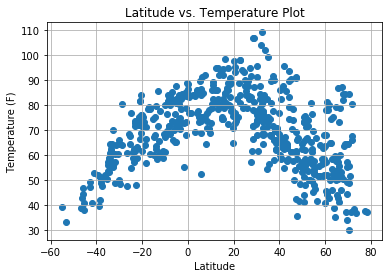

In [14]:
# Build a scatter plot Lat vs Temp
plt.scatter(weather_data_fin_df["lat"], weather_data_fin_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

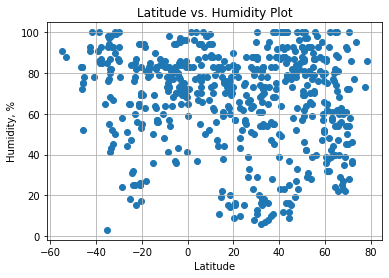

In [15]:
# Build a scatter plot Lat vs Temp
plt.scatter(weather_data_fin_df["lat"], weather_data_fin_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity, %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidityPlot.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

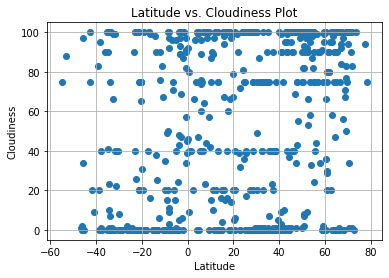

In [16]:
# Build a scatter plot Lat vs Temp
plt.scatter(weather_data_fin_df["lat"], weather_data_fin_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

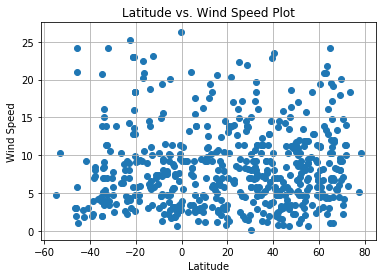

In [17]:
# Build a scatter plot Lat vs Temp
plt.scatter(weather_data_fin_df["lat"], weather_data_fin_df["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindPlot.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [22]:
# Create Northern Hemisphere DataFrames (greater than or equal to 0 degrees latitude)
northern_df = weather_data_fin_df.loc[(weather_data_fin_df['lat'] >= 0)] 
northern_df.head(3)

,city,lat,temp,humidity,clouds,wind_speed
2,svetlogorsk,52.63,74.03,80,53,8.37
4,hilo,19.73,70.86,73,20,3.36
6,bridlington,54.08,56.71,93,100,8.05


In [21]:
# Create Southern Hemisphere DataFrames (less than 0 degrees latitude)
southern_df = weather_data_fin_df.loc[(weather_data_fin_df['lat'] < 0)] 
southern_df.head(3)

,city,lat,temp,humidity,clouds,wind_speed
0,busselton,-33.65,62.6,43,0,5.41
1,port alfred,-33.59,64,82,0,4
3,hermanus,-34.42,57,94,23,7


In [ ]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data_nh['lat']
y_values = weather_data_nh['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.40234859880755397


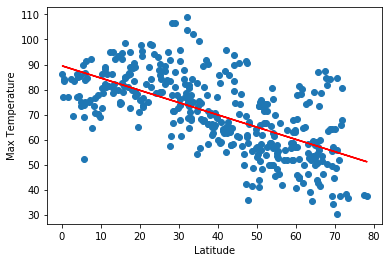

In [35]:
x_values = northern_df['lat'].astype('float')
y_values = northern_df['temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("NHemp_MTempVsLatR.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.650329686631129


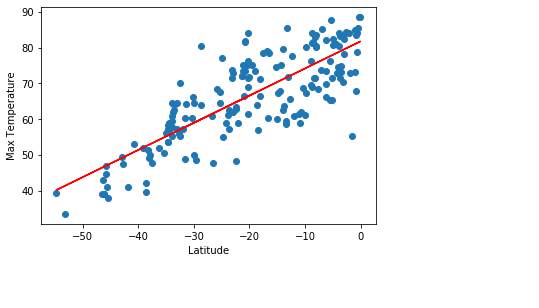

In [36]:
x_values = southern_df['lat'].astype('float')
y_values = southern_df['temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("SHemp_MTempVsLatR.png")

# Show plot
plt.show()

In [ ]:
There is a substantial relationship/correlation between temperature and Latitude for both Southern & Northerns Hemispheres: 
approximately 40% for northern and even greater (65%) for south hemisphere 
( percentage of the response variable variationthat is explained by a linear model)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.00425463036159991


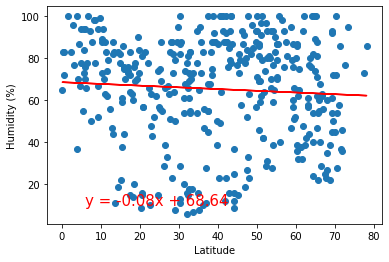

In [37]:
x_values = northern_df['lat'].astype('float')
y_values = northern_df['humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("NHemp_HumVsLatR.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.005444181749280628


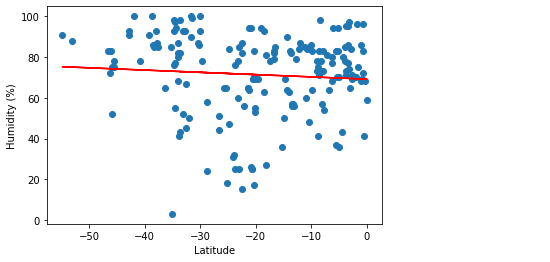

In [43]:
x_values = southern_df['lat'].astype('float')
y_values = southern_df['humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("SHemp_HumVsLatR.png")

# Show plot
plt.show()

In [ ]:
The relationship between the humidity and latitude is non-substantial for both nothern and southern hemispheres (~0.4% and ~0.5% respectively)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.027813637251444867


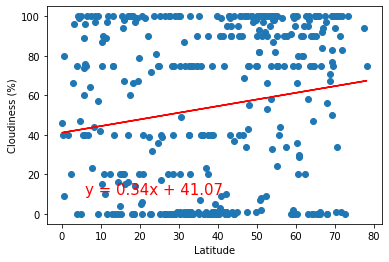

In [39]:
x_values = northern_df['lat'].astype('float')
y_values = northern_df['clouds'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("NHemp_CloudVsLatR.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.021692741607701092


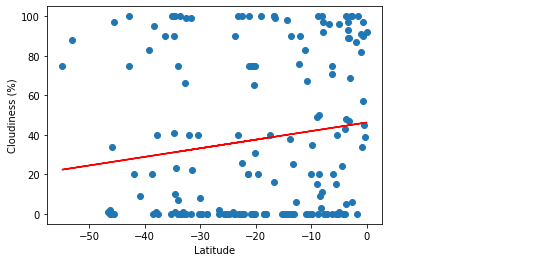

In [40]:
x_values = southern_df['lat'].astype('float')
y_values = southern_df['clouds'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("SHemp_CloudVsLatR.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.002657905330280131


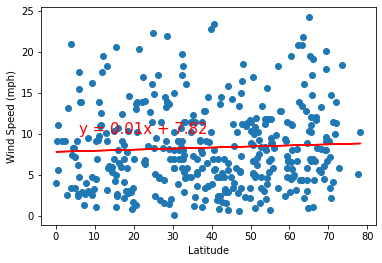

In [41]:
x_values = northern_df['lat'].astype('float')
y_values = northern_df['wind_speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("NHemp_WindVsLatR.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 6.14599983935025e-05


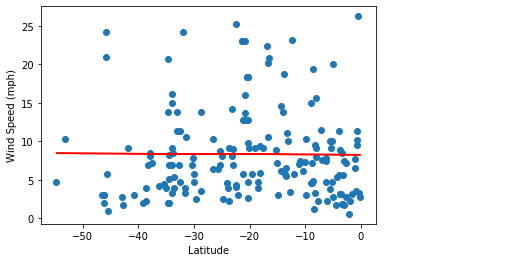

In [42]:
x_values = southern_df['lat'].astype('float')
y_values = southern_df['wind_speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("SHemp_WindVsLatR.png")

# Show plot
plt.show()

In [ ]:
The relationship between cloudiness and wind speed and latitude are non-substantial for both nothern and southern hemispheres